In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_cleaned = pd.read_csv('df_cleaned.csv')

In [3]:
df_cleaned.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,vacina_hep_b_crianca,relato_sarampo,...,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,PIB,populacao,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33753499.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,32716210.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31541209.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,30466479.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,29249157.0,18.2,18.2,0.454,9.5


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dic_dev = {"Developing": 1, "Developed": 0}

df_cleaned['status_encoded'] = df_cleaned['status'].map(dic_dev)

In [18]:
df_cleaned2 = df_cleaned.drop(columns = ['status', 'morte_HIV_4anos', 'composicao_recursos_renda', 'mortalidade_adulta', 'escolaridade', "IMC"])
# df_cleaned2 = df_cleaned[['morte_HIV_4anos', 'composicao_recursos_renda', 'mortalidade_adulta', 'escolaridade', "IMC",
#                           'expectativa_vida', 'pais', 'mortalidade_5anos', 'vacina_poliomelite_crianca']]

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [20]:
# Suponha que seu DataFrame se chama df_cleaned2 e a variável alvo é 'target'
X = df_cleaned2.drop(columns=['expectativa_vida'])
y = df_cleaned2['expectativa_vida']

# Divisão inicial: treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.model_selection import train_test_split

# Suponha que o DataFrame tenha uma coluna chamada 'pais'
# Agrupar por países para evitar vazamento
paises = df_cleaned2['pais'].unique()

# Divisão de países em treino e teste (80% treino, 20% teste)
paises_train, paises_test = train_test_split(paises, test_size=0.2, random_state=42)

# Separar os conjuntos com base na divisão dos países
train_mask = df_cleaned2['pais'].isin(paises_train)
test_mask = df_cleaned2['pais'].isin(paises_test)

X_train = X[train_mask]
y_train = y[train_mask]

X_test = X[test_mask]
y_test = y[test_mask]


In [22]:
X_test.pais.unique()

array(['Azerbaijan', 'Bangladesh', 'Barbados', 'Bosnia And Herzegovina',
       'Botswana', 'Bulgaria', 'Cambodia', 'Central African Republic',
       'Chad', 'Chile', 'Croatia', 'Germany', 'Guatemala', 'Ireland',
       'Italy', 'Jamaica', 'Kazakhstan', 'Liberia', 'Malawi', 'Malaysia',
       'Netherlands', 'Papua New Guinea', 'Paraguay', 'Serbia', 'Spain',
       'Sri Lanka', 'Togo', 'Tonga', 'Turkmenistan', 'Uzbekistan'],
      dtype=object)

In [23]:
X_train.pais.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Bahrain', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Canada', 'China', 'Colombia', 'Comoros',
       'Costa Rica', 'Cuba', 'Cyprus', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'France', 'Gabon', 'Georgia',
       'Ghana', 'Greece', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq', 'Israel',
       'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'New 

In [24]:
X_train.drop(columns=['pais'], inplace=True)
X_test.drop(columns=['pais'], inplace=True)

___
## Random Forest Regressor
___

### Treino e Validação

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Lista de números de árvores a testar
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
arvores_mse = []
arvores_mae = []
# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in arvores:
    print(f"n_estimators = {n}")
    list_fold_mse = []
    list_fold_mae = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Random Forest para Regressão
        model = RandomForestRegressor(random_state=42, n_estimators=n)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_mae = mean_absolute_error(y_val_fold, y_val_pred)
        list_fold_mse.append(fold_mse)
        list_fold_mae.append(fold_mae)

    # Média do MSE nos folds
    mean_mse = np.mean(list_fold_mse)
    mean_mae = np.mean(list_fold_mae)
    # print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")
    arvores_mse.append(mean_mse)
    arvores_mae.append(mean_mae)



n_estimators = 10
n_estimators = 20
n_estimators = 30
n_estimators = 40
n_estimators = 50
n_estimators = 60
n_estimators = 70
n_estimators = 80
n_estimators = 90
n_estimators = 100


Melhor número de árvores: 80 com MSE: 5.9466
Melhor número de árvores: 100 com MAE: 1.5676


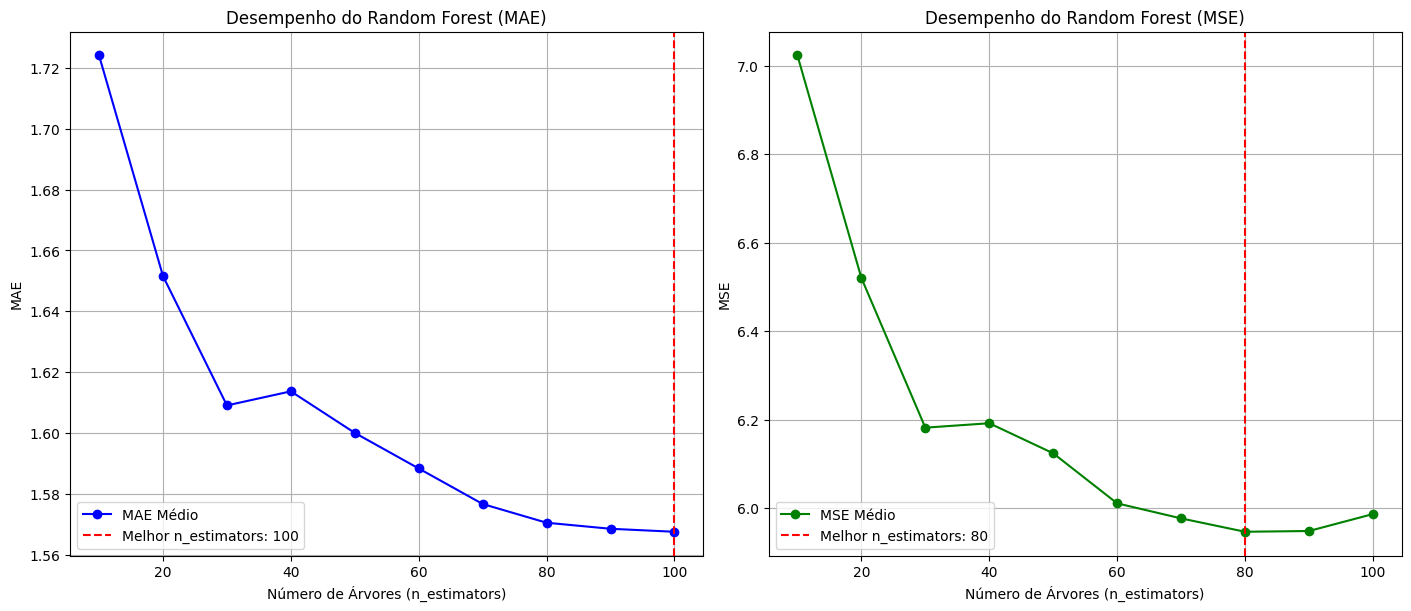

In [26]:
# Identificar o melhor número de árvores
best_n_mse_index = np.argmin(arvores_mse)
best_n_mse = arvores[best_n_mse_index]
print(f"Melhor número de árvores: {best_n_mse} com MSE: {arvores_mse[best_n_mse_index]:.4f}")

# Identificar o melhor número de árvores
best_n_mae_index = np.argmin(arvores_mae)
best_n_mae = arvores[best_n_mae_index]
print(f"Melhor número de árvores: {best_n_mae} com MAE: {arvores_mae[best_n_mae_index]:.4f}")


# Criar subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Gráfico do MAE
axs[0].plot(arvores, arvores_mae, marker='o', linestyle='-', color='b', label='MAE Médio')
axs[0].axvline(x=best_n_mae, color='r', linestyle='--', label=f'Melhor n_estimators: {best_n_mae}')
axs[0].set_xlabel('Número de Árvores (n_estimators)')
axs[0].set_ylabel('MAE')
axs[0].set_title('Desempenho do Random Forest (MAE)')
axs[0].legend()
axs[0].grid()

# Gráfico do MSE
axs[1].plot(arvores, arvores_mse, marker='o', linestyle='-', color='g', label='MSE Médio')
axs[1].axvline(x=best_n_mse, color='r', linestyle='--', label=f'Melhor n_estimators: {best_n_mse}')
axs[1].set_xlabel('Número de Árvores (n_estimators)')
axs[1].set_ylabel('MSE')
axs[1].set_title('Desempenho do Random Forest (MSE)')
axs[1].legend()
axs[1].grid()

# Mostrar o gráfico
plt.show()

### Validação vs Teste

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Lista de números de árvores a testar
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
mse_teste = []  # Armazena MSE do conjunto de teste
mse_validacao = []  # Armazena MSE médio da validação cruzada

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in arvores:
    fold_metrics = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Random Forest para Regressão
        model = RandomForestRegressor(random_state=42, n_estimators=n)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)

    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    mse_validacao.append(mean_mse)

    # Avaliação no conjunto de teste
    model_final = RandomForestRegressor(random_state=42, n_estimators=n)
    model_final.fit(X_train, y_train)
    y_test_pred = model_final.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    mse_teste.append(test_mse)


Melhor número de árvores: 80 com MSE de Validação: 5.9466
Melhor número de árvores: 90 com MSE de Teste: 25.6104


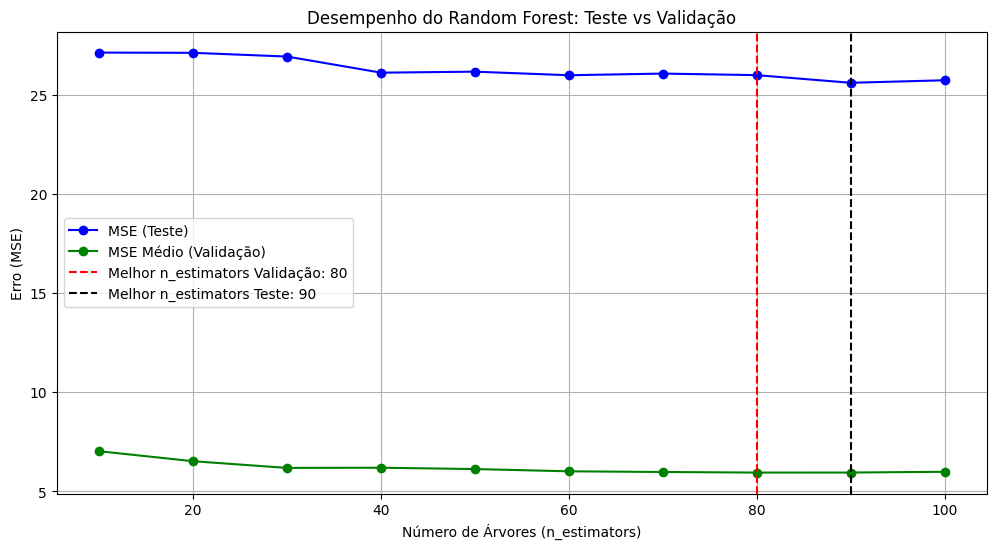

In [28]:

# Identificar o melhor número de árvores
best_n_index = np.argmin(mse_validacao)
best_n_index_teste = np.argmin(mse_teste)
best_n = arvores[best_n_index]
best_n_teste = arvores[best_n_index_teste]
print(f"Melhor número de árvores: {best_n} com MSE de Validação: {mse_validacao[best_n_index]:.4f}")
print(f"Melhor número de árvores: {best_n_teste} com MSE de Teste: {mse_teste[best_n_index_teste]:.4f}")

# Plotando os erros de teste e validação no mesmo gráfico
plt.figure(figsize=(12, 6))
plt.plot(arvores, mse_teste, marker='o', linestyle='-', color='b', label='MSE (Teste)')
plt.plot(arvores, mse_validacao, marker='o', linestyle='-', color='g', label='MSE Médio (Validação)')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Melhor n_estimators Validação: {best_n}')
plt.axvline(x=best_n_teste, color='k', linestyle='--', label=f'Melhor n_estimators Teste: {best_n_teste}')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Erro (MSE)')
plt.title('Desempenho do Random Forest: Teste vs Validação')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Ajuste no conjunto de treino completo
final_model = RandomForestRegressor(random_state=42, n_estimators=60)
final_model.fit(X_train, y_train)

# Avaliação no teste
y_test_pred = final_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Teste - MSE: {test_mse:.4f}")
print(f"Teste - MAE: {test_mae:.4f}")


Teste - MSE: 5.8795
Teste - MAE: 1.7509


Text(0.5, 1.0, 'Importância das Features - RandomForestRegressor')

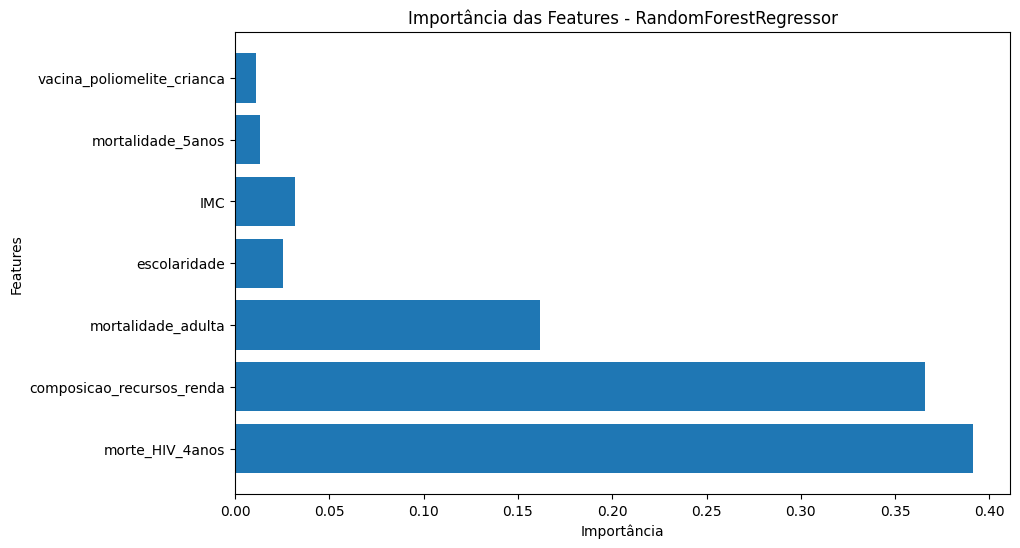

In [17]:
# Importância das features
importances = final_model.feature_importances_

# Criando um gráfico de barras para visualizar a importância das features
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances)  # X_train.columns são os nomes das features
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - RandomForestRegressor')